In [1]:
#- CRIM per capita crime rate by town 
#- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
#- INDUS proportion of non-retail business acres per town 
#- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
#- NOX nitric oxides concentration (parts per 10 million) 
#- RM average number of rooms per dwelling    (linear regression use this feature)
#- AGE proportion of owner-occupied units built prior to 1940 
#- DIS weighted distances to five Boston employment centres 
#- RAD index of accessibility to radial highways 
#- TAX full-value property-tax rate per $10,000 
#- PTRATIO pupil-teacher ratio by town 
#- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
#- LSTAT % lower status of the population 
#- MEDV Median value of owner-occupied homes in $1000


In [2]:
import pandas as pd

In [3]:
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('data/housing.csv', delim_whitespace=True, names = names)
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
# I - Linear Regression

# Build a model using a linear regression (Scikit-learn) algorithm to predict house prices. 
# You can pick a feature from the dataset to work with the model.

# Plot the data with the best fit line.
# Calculate a RMSE score.
# Calculate a R-squared score.

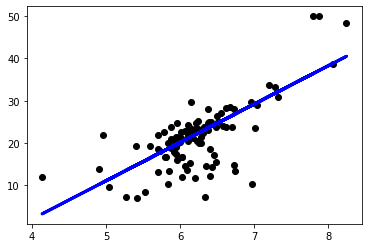

Linear Regression
RMSE: 5.48
R-squared: 0.50


In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

np.random.seed(2)

n = len(data)

n_test = int(0.2 * n)
n_train = n - n_test

idx = np.arange(n)
np.random.shuffle(idx)

data_shuffled = data.iloc[idx]

data_train = data_shuffled.iloc[:n_train].copy()
data_test = data_shuffled.iloc[n_train:].copy()


data_X_train_1 = data_train['RM']
data_X_train_1 = data_X_train_1.values.reshape(-1,1) 
data_X_test_1 = data_test['RM']
data_X_test_1 = data_X_test_1.values.reshape(-1,1) 

data_y_train_1 = data_train['MEDV']
data_y_train_1 = data_y_train_1.values.reshape(-1,1) 
data_y_test_1 = data_test['MEDV']
data_y_test_1 = data_y_test_1.values.reshape(-1,1)

linear_model = LinearRegression()
linear_model.fit(data_X_train_1, data_y_train_1)
data_y_predict_1 = linear_model.predict(data_X_test_1)


plt.scatter(data_X_test_1, data_y_test_1,  color='black')
plt.plot(data_X_test_1, data_y_predict_1, color='blue', linewidth=3)
plt.show()

print("Linear Regression")
print('RMSE: %.2f' % np.sqrt(mean_squared_error(data_y_test_1, data_y_predict_1)))
print('R-squared: %.2f'% r2_score(data_y_test_1, data_y_predict_1))

In [6]:
# II - Polynomial Regression

# Build a model using a Polynomial regression algorithm to predict house prices. 
# Keep the same feature you selected from the previous part to work with the polynomial model. 

Polynomial Regression
Degree:  2
RMSE: 13.27805
R-squared: -1.96740


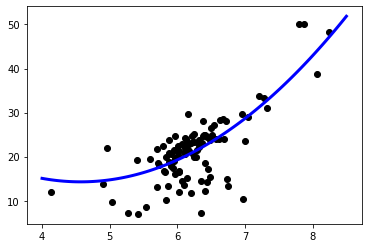



Polynomial Regression
Degree:  20
RMSE: 14.28554
R-squared: -2.43480


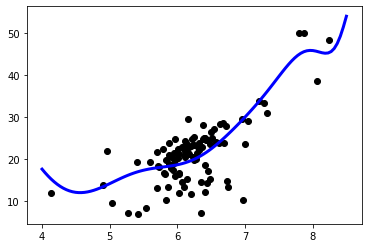

In [12]:
from sklearn.preprocessing import PolynomialFeatures

degree = [2, 20]
for d in degree:
    
    poly=PolynomialFeatures(degree=d)
    poly_data_X_train = poly.fit_transform(data_X_train_1)
    poly_data_X_test = poly.fit_transform(data_X_test_1)
    poly_model = LinearRegression()
    poly_model.fit(poly_data_X_train, data_y_train_1)

    xx = np.linspace(4, 8.5, 101)
    xx_tran = poly.fit_transform(xx.reshape(xx.shape[0], 1))
    data_y_predict_2 = poly_model.predict(xx_tran)

    print ("Polynomial Regression")
    print ("Degree:  %s" % d)
    print('RMSE: %.5f' % np.sqrt(mean_squared_error(data_y_test_1, data_y_predict_2)))
    print('R-squared: %.5f'% r2_score(data_y_test_1, data_y_predict_2))
    plt.scatter(data_X_test_1, data_y_test_1,  color='black')
    plt.plot(xx, data_y_predict_2, color='blue', linewidth=3)
    plt.show()
    print ("\n")

In [ ]:
# III - Multiple Regression
# Build a model using a multiple regression algorithm to predict house prices. 
# Select 3 or more features to work with the model. 

# Plot the curve.
# Calculate a RMSE score.
# Calculate a R-squared score.
# Calculate an adjusted R-squared score.


In [13]:
import statsmodels.formula.api as smf

df = data[['RM','TAX', 'B','LSTAT', 'MEDV']]

np.random.seed(2)

n = len(df)

n_test = int(0.2 * n)
n_train = n - n_test

idx = np.arange(n)
np.random.shuffle(idx)

data_shuffled = df.iloc[idx]

data_train = data_shuffled.iloc[:n_train].copy()
data_test = data_shuffled.iloc[n_train:].copy()

data_X_train_mul = data_train[['RM','TAX','LSTAT']]
data_y_train_mul = data_train[['MEDV']]
data_X_test_mul = data_test[['RM','TAX','LSTAT']]
data_y_test_mul = data_test[['MEDV']]


mul_model = LinearRegression()
mul_model.fit(data_X_train_mul,data_y_train_mul)
data_y_predict_mul = mul_model.predict(data_X_test_mul)

print("Multiple Regression")

print('RMSE: %.2f' % np.sqrt(mean_squared_error(data_y_test_mul, data_y_predict_mul)))
print('R-squared: %.5f'% r2_score(data_y_test_mul, data_y_predict_mul))
print('Adjusted R-squared: %.5f'% (1 - (1 - r2_score(data_y_test_mul, data_y_predict_mul)) * (len(data_y_train_mul) - 1) / (len(data_y_train_mul) - data_X_train_mul.shape[1] - 1)))


Multiple Regression
RMSE: 4.72
R-squared: 0.62517
Adjusted R-squared: 0.62237
